In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes_clean_data.csv')

In [3]:
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

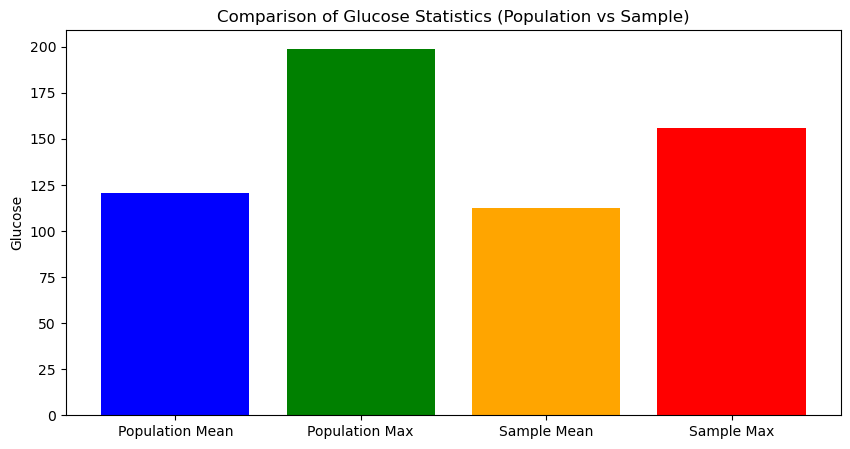

In [20]:
sample_data = data.sample(n=25)
glucose_mean = data['Glucose'].mean()
glucose_max = data['Glucose'].max()
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()


colors = ['blue', 'green', 'orange', 'red']
plt.figure(figsize=(10, 5))
plt.bar(['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max'],
        [glucose_mean, glucose_max, sample_mean_glucose, sample_max_glucose],
        color=colors)  # Specify colors
plt.title('Comparison of Glucose Statistics (Population vs Sample)')
plt.ylabel('Glucose')
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

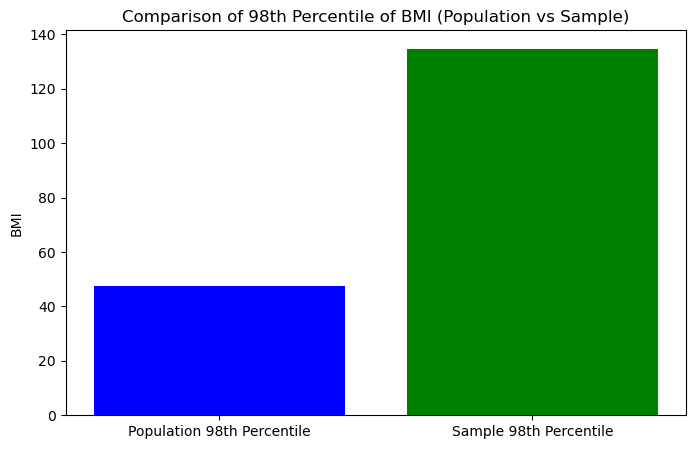

In [13]:
# Calculate 98th percentile for population and sample
population_98th_bmi = np.percentile(data['BMI'], 98)
sample_98th_bmi = np.percentile(sample_data, 98)  # Adjusted this line

# Define colors
colors = ['blue', 'green']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(['Population 98th Percentile', 'Sample 98th Percentile'],
        [population_98th_bmi, sample_98th_bmi],
        color=colors)
plt.title('Comparison of 98th Percentile of BMI (Population vs Sample)')
plt.ylabel('BMI')
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

In [17]:
import seaborn as sns

/var/folders/bx/96r66sx574ld1d4jw_j0jvp00000gn/T/ipykernel_1138/2512158673.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_means, color='blue', shade=True)
/var/folders/bx/96r66sx574ld1d4jw_j0jvp00000gn/T/ipykernel_1138/2512158673.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_stds, color='green', shade=True)
/var/folders/bx/96r66sx574ld1d4jw_j0jvp00000gn/T/ipykernel_1138/2512158673.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_percentiles, color='purple', shade=True)


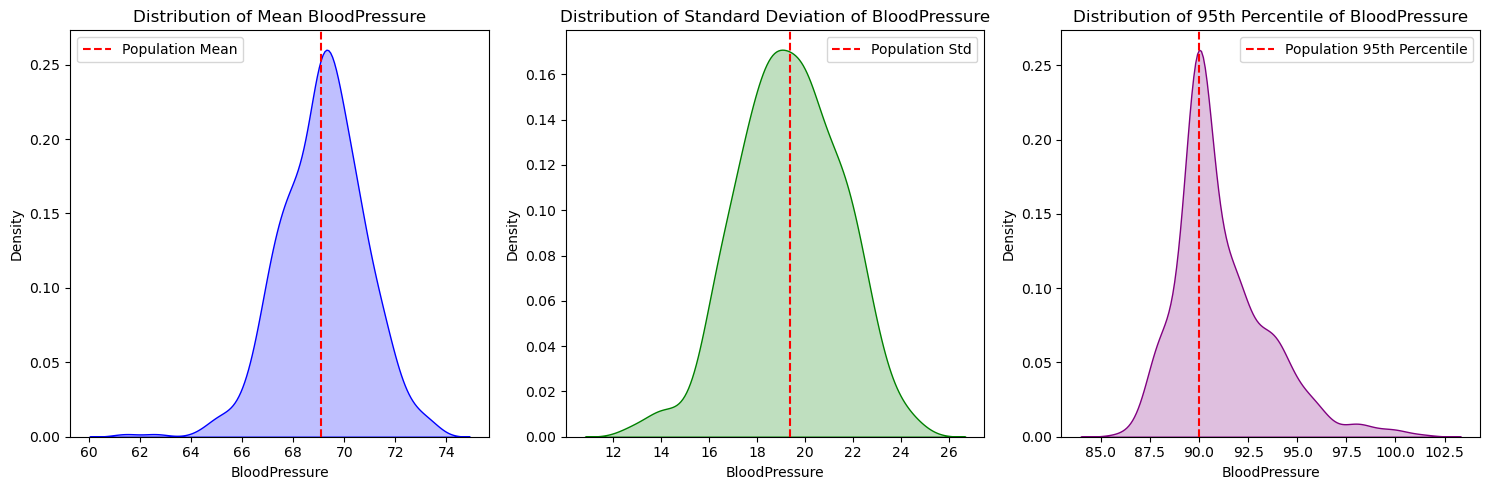

In [19]:
population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 95)

n_bootstrap = 500
bootstrap_size = 150


bootstrap_means = np.array([np.mean(np.random.choice(data['BloodPressure'], size=bootstrap_size, replace=True))
                            for _ in range(n_bootstrap)])
bootstrap_stds = np.array([np.std(np.random.choice(data['BloodPressure'], size=bootstrap_size, replace=True))
                           for _ in range(n_bootstrap)])
bootstrap_percentiles = np.array([np.percentile(np.random.choice(data['BloodPressure'], size=bootstrap_size, replace=True), 95)
                                   for _ in range(n_bootstrap)])


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.kdeplot(bootstrap_means, color='blue', shade=True)
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Distribution of Mean BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 2)
sns.kdeplot(bootstrap_stds, color='green', shade=True)
plt.axvline(x=population_std, color='red', linestyle='--', label='Population Std')
plt.title('Distribution of Standard Deviation of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()


plt.subplot(1, 3, 3)
sns.kdeplot(bootstrap_percentiles, color='purple', shade=True)
plt.axvline(x=population_percentile, color='red', linestyle='--', label='Population 95th Percentile')
plt.title('Distribution of 95th Percentile of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()